In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import math
import time
import networkx as nx
import pickle

In [ ]:
from NeuralNetwork import * 
from Observation import *
from AgentModule import *
from InitializationVariables import *
from Environment import *
from Evolution import *

In [ ]:
#Initialize environment and next_environment

with open('winner-feedforward', 'rb') as f:
    bestGene = pickle.load(f)


environment, agents, environment_pop_density = initialize()
agents = initializeAgents(agent_count, agents, bestGene)
barrierMask = getBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()

In [4]:
# #For an easier environment that reaches equilibrium much faster
barrierMask = getBarrierMask()
barrierMask[0:-1,0:-1] = 0

barrierMask[ 1*environment_ySize//4 :3*environment_ySize//4   , 1*environment_xSize//4 : round(1.3*environment_xSize//4)  ] = 1
# barrierMask[ 1*environment_ySize//4 :round(1.3*environment_ySize//4)   , 1*environment_xSize//4 : round(3*environment_xSize//4)  ] = 1




# survivalMask[environment_xSize//4 : 3*environment_xSize//4, environment_ySize//4 : 3*environment_ySize//4  ]= 1
survivalMask[0:-1,0:-1] = 0
survivalMask[:, 0 :environment_ySize//4   ]= 1

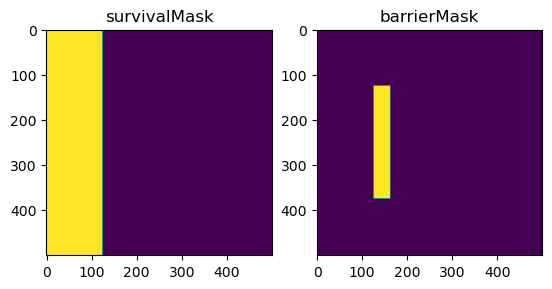

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(survivalMask)
ax1.set_title('survivalMask')
ax2.imshow(barrierMask)
ax2.set_title('barrierMask')
plt.savefig('EnvironmentTrainingParams')

In [6]:
numRunsPerCount = 10
avgLive = 0
for _ in range(numRunsPerCount):
    print('newPop')
    agents = []
    agents = initializeAgents(agent_count, agents, bestGene)
    livingAgents, environment, killCount = simCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, False)
    avgLive += (len(livingAgents)/len(agents))/numRunsPerCount
avgLive

newPop
newPop
newPop
newPop
newPop
newPop
newPop
newPop
newPop
newPop


0.21333333333333332

In [7]:
arr1 = [.453, .4, .41666, .47, .4966]
arr2 = [.3266, .2533, .20333, .21, .2133]
widths = [1,2,3,4,5]


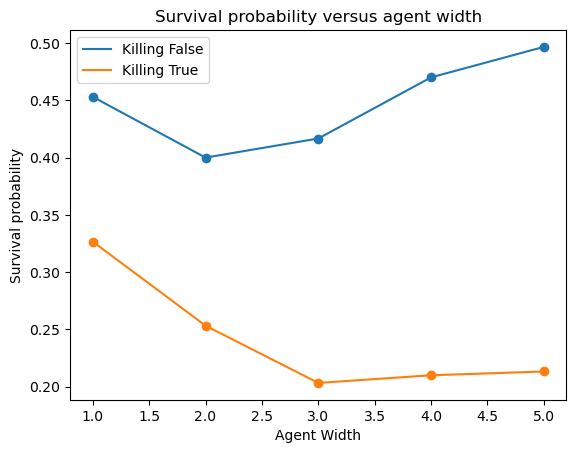

In [17]:
plt.plot(widths, arr1, label = 'Killing False')
plt.plot(widths, arr2, label = 'Killing True')
plt.scatter(widths, arr1)
plt.scatter(widths, arr2)
plt.xlabel('Agent Width')
plt.ylabel('Survival probability')
plt.title('Survival probability versus agent width')
plt.legend()
plt.savefig('Survival probability versus agent width')

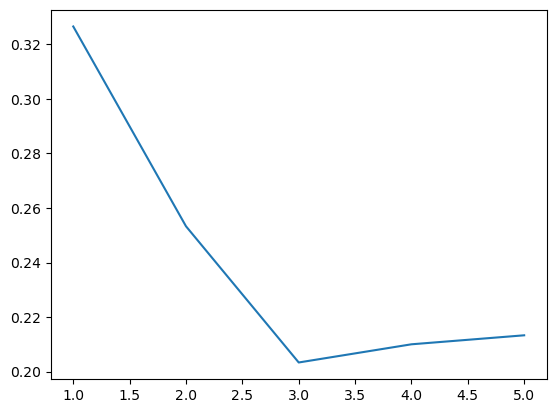

In [9]:
plt.plot(widths, arr2)